In [4]:
import numpy as np

# Load a NumPy array from a .npy file
data = np.load(r'train\train\s1_d2_p002_002_data_time_series.npy')

# Print the array
print(data)

# Get the shape of the array
print(f'Shape: {data.shape}')

# Get the data type of the array
print(f'Data Type: {data.dtype}')

[[-1.5024611e+05 -1.3947131e+05 -1.6976562e+05 ...  9.3333344e+01
   2.3388000e+04  1.0000000e+00]
 [-1.5028661e+05 -1.3956180e+05 -1.6974086e+05 ...  9.3333344e+01
   2.3389000e+04  1.0000000e+00]
 [-1.4997638e+05 -1.3916098e+05 -1.6970420e+05 ...  9.3333344e+01
   2.3390000e+04  1.0000000e+00]
 ...
 [-1.5547311e+05 -1.4366539e+05 -1.7719748e+05 ...  9.3333344e+01
   7.7099000e+04  1.0000000e+00]
 [-1.5553006e+05 -1.4377259e+05 -1.7717298e+05 ...  9.3333344e+01
   7.7100000e+04  1.0000000e+00]
 [-1.5525612e+05 -1.4341470e+05 -1.7714178e+05 ...  9.3333344e+01
   7.7101000e+04  1.0000000e+00]]
Shape: (53714, 17)
Data Type: float32


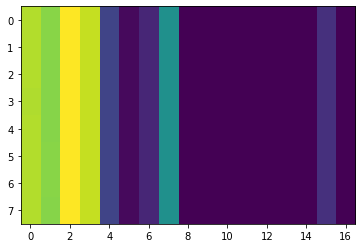

In [5]:
import matplotlib.pyplot as plt
plt.imshow(np.abs(data[0:8]), aspect='auto')

In [6]:
data

array([[-1.5024611e+05, -1.3947131e+05, -1.6976562e+05, ...,
         9.3333344e+01,  2.3388000e+04,  1.0000000e+00],
       [-1.5028661e+05, -1.3956180e+05, -1.6974086e+05, ...,
         9.3333344e+01,  2.3389000e+04,  1.0000000e+00],
       [-1.4997638e+05, -1.3916098e+05, -1.6970420e+05, ...,
         9.3333344e+01,  2.3390000e+04,  1.0000000e+00],
       ...,
       [-1.5547311e+05, -1.4366539e+05, -1.7719748e+05, ...,
         9.3333344e+01,  7.7099000e+04,  1.0000000e+00],
       [-1.5553006e+05, -1.4377259e+05, -1.7717298e+05, ...,
         9.3333344e+01,  7.7100000e+04,  1.0000000e+00],
       [-1.5525612e+05, -1.4341470e+05, -1.7714178e+05, ...,
         9.3333344e+01,  7.7101000e+04,  1.0000000e+00]], dtype=float32)

In [7]:
data -= data.mean()

In [8]:
data

array([[-118315.04 , -107540.24 , -137834.56 , ...,   32024.404,
          55319.07 ,   31932.07 ],
       [-118355.54 , -107630.73 , -137809.78 , ...,   32024.404,
          55320.07 ,   31932.07 ],
       [-118045.305, -107229.914, -137773.12 , ...,   32024.404,
          55321.07 ,   31932.07 ],
       ...,
       [-123542.04 , -111734.32 , -145266.4  , ...,   32024.404,
         109030.07 ,   31932.07 ],
       [-123598.99 , -111841.52 , -145241.9  , ...,   32024.404,
         109031.07 ,   31932.07 ],
       [-123325.055, -111483.63 , -145210.72 , ...,   32024.404,
         109032.07 ,   31932.07 ]], dtype=float32)

In [9]:
data[0][0:8]

array([-118315.04 , -107540.24 , -137834.56 , -122955.62 ,   -2893.039,
         36235.12 ,   13836.17 ,  117066.63 ], dtype=float32)

### Plot EEG CH.

In [10]:
import pandas as pd

data = pd.read_csv('eeg_df.csv')

In [11]:
from scipy import signal
import pandas as pd

# We want to apply a bandpass between 4 and 40 Hz
cutoffs = [4, 40]

# The sample frequency of our device is 250Hz
fs = 250

# We have to decide the order of the filter.
# The order determines the sharpness of the filter, i.e., around the
# cutoff, do we allow some of the nearby frequency through (lower
# order) or do we want to have a sharp cutoff (high order)? A higher
# order introduces a bigger effect on the signal when initializing,
# thereby destroying the original signal at that part. Note that
# later we apply forward and backward filtering using
# signal.filtfilt, thereby essentially doubling the order we
# determine below.
order = 2

# Initialize the filter coefficients
b, a = signal.butter(order, [cutoffs[0]/(fs/2), cutoffs[1]/(fs/2)], "bandpass")

# Assuming 'data' is a pandas DataFrame with electrode channel data in columns
# Then apply the filter for each electrode channel:
for column in data.columns:
    data.loc[:, column] = signal.filtfilt(b, a, data.loc[:, column])

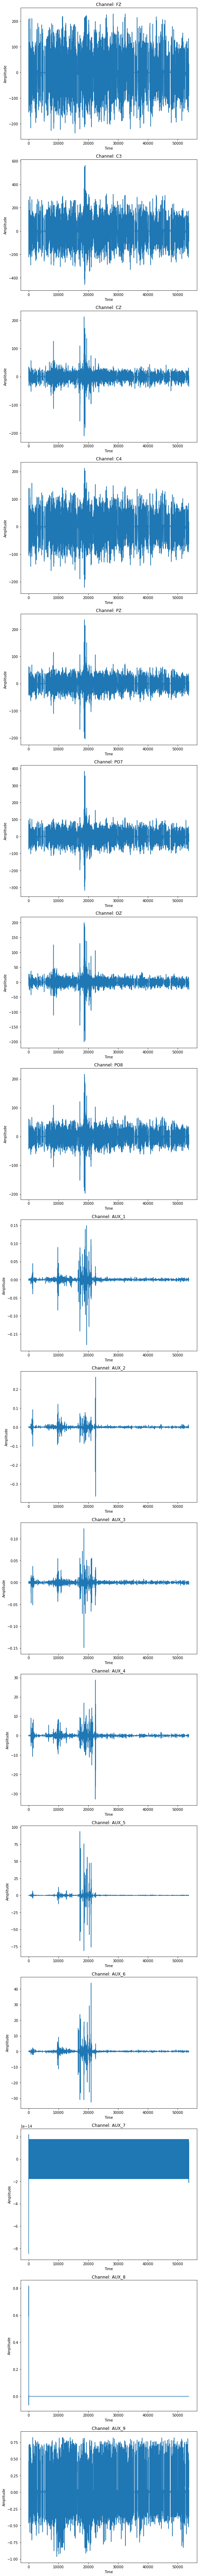

In [12]:
import matplotlib.pyplot as plt

# Plot the filtered data
fig, axs = plt.subplots(nrows=len(data.columns), figsize=(8, 6*len(data.columns)))

if len(data.columns) == 1:
    axs = [axs]  # Make axs a list if it's a single axis object

for ax, column in zip(axs, data.columns):
    ax.plot(data.index, data[column])
    ax.set_title(f'Channel: {column}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [13]:
import numpy as np

In [21]:
data = np.load(r'class\110\0_0_1_110.npy')

In [26]:
data[1] * data[0]

array([-9.29256034e+09, -9.29256094e+09, -9.29256155e+09, ...,
       -9.28465485e+09, -9.29692412e+09, -9.30622504e+09])